## NETFLIX MOVIES & TV SHOWS DATA ANALYSIS

### IMPORTING THE LIBRARIES

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
import plotly.offline as po
po.init_notebook_mode(connected = True)

### LOADING THE DATASET

In [44]:
# reading the dataset 
df = pd.read_csv("netflix_dataset.csv")

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# looking at the shape of the dataset
df.shape

(8807, 12)

##### So here we have `8807` movies and shows with `12` attributes of them

#### With printing head(), We can easily see the Nan values, so lets clean them up.

### DATA CLEANING

#### Check for missing values

In [47]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### so we can see plenty of null/missing values in director, cast, country columns 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### date_added and duration columns are usually in DataTime object and integer datatype respectively instead of object. Now we will have to carefully analyse them and check for anomalies

In [49]:
df.nunique()  #analysing the number of unique values in every columns.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [50]:
check_col = ["date_added", "duration"]

for col in check_col:
    uniques = df[col].unique()
    print("  ",col,":")
    print(uniques)

   date_added :
['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']
   duration :
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'


##### Duration column is consistent, so we'll leave as it is, date_added is also consistent. date_added will be useful in further analysis

Datatypes are satisfactory, Hence we're gonna focus on Missing Values. we have already noted that 3 columns have plenty number of missing values. we'll analyse whether to drop the null values

### Visualizing the Missing Values

<AxesSubplot:>

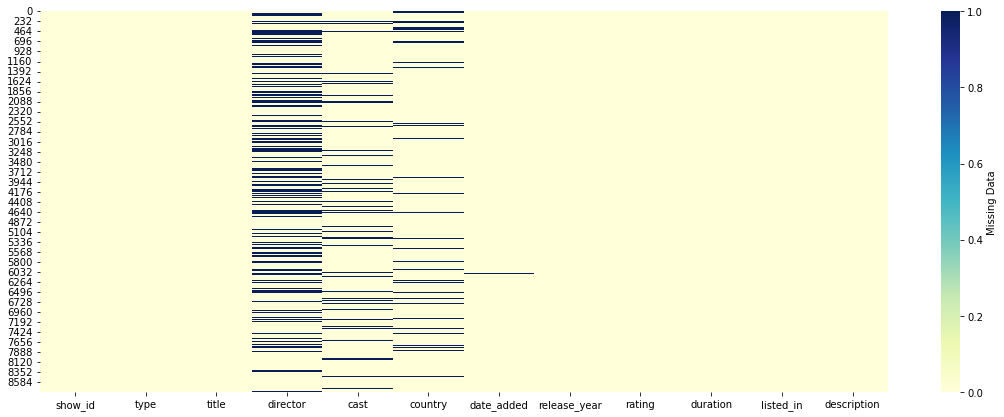

In [51]:
plt.figure(figsize = (19,7) )
sns.heatmap(df.isna(), cmap="YlGnBu"
            ,cbar_kws={'label': 'Missing Data'}
           )

- `director`, `cast` and `country` have missing values in a random manner. We will thus replace them with "UNKOWN" keyword. This will be helpful later on.
- for, date_added

In [52]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [53]:
# replacing the NaN values with UNKNOWN
df[ ["director", "cast", "country"] ] = df[ ["director", "cast", "country"] ].replace(np.nan, "UNKNOWN")

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [55]:
# Group by the values of the rating column to check the count of the values in each column of the each rating 
df.groupby(by="rating").count()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,0,1,1
74 min,1,1,1,1,1,1,1,1,0,1,1
84 min,1,1,1,1,1,1,1,1,0,1,1
G,41,41,41,41,41,41,41,41,41,41,41
NC-17,3,3,3,3,3,3,3,3,3,3,3
NR,80,80,80,80,80,80,79,80,80,80,80
PG,287,287,287,287,287,287,287,287,287,287,287
PG-13,490,490,490,490,490,490,490,490,490,490,490
R,799,799,799,799,799,799,799,799,799,799,799


"66 min" , "74 min", "84 min" are inaccurate rating. This record is mistakenly placed into rating instead of duration.

In [56]:
# removing the anamolies 
def anamoly_detect(frame):
    if( "min" in str(frame["rating"])):
        frame["duration"] = frame["rating"]
        frame["rating"] = np.nan
    return frame;

df = df.apply(anamoly_detect, axis=1)

In [57]:
df.groupby(by="rating").count()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
G,41,41,41,41,41,41,41,41,41,41,41
NC-17,3,3,3,3,3,3,3,3,3,3,3
NR,80,80,80,80,80,80,79,80,80,80,80
PG,287,287,287,287,287,287,287,287,287,287,287
PG-13,490,490,490,490,490,490,490,490,490,490,490
R,799,799,799,799,799,799,799,799,799,799,799
TV-14,2160,2160,2160,2160,2160,2160,2157,2160,2160,2160,2160
TV-G,220,220,220,220,220,220,220,220,220,220,220
TV-MA,3207,3207,3207,3207,3207,3207,3205,3207,3207,3207,3207


In [58]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

#### Null values in rating Columns

In [59]:
df["rating"].isna().sum()

7

In [60]:
mask = df["rating"].isna()
df[mask]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,UNKNOWN,"Oprah Winfrey, Ava DuVernay",UNKNOWN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,UNKNOWN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,UNKNOWN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


As rating contains some NAN values, and we cannot fill these values by any means, So we're replacing it with UNKNOWN value

In [61]:
# replace NaN values
df["rating"] = df["rating"].replace(np.nan, "UNKNOWN")

In [62]:
df[df["rating"] == "UNKNOWN"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,UNKNOWN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,UNKNOWN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,UNKNOWN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,UNKNOWN,"Oprah Winfrey, Ava DuVernay",UNKNOWN,"January 26, 2017",2017,UNKNOWN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,UNKNOWN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,UNKNOWN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,UNKNOWN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,UNKNOWN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,UNKNOWN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### Null values in Date_added Column

In [63]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [64]:
df["date_added"] = df["date_added"].replace(np.nan, "UNKNOWN")

In [65]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Dropping the show_id column as it has no importance in our analysis.

In [66]:
df.drop("show_id", axis=1, inplace=True)

In [67]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### DONE WITH DATA CLEANING

### GETTING INSIGHTS THROUGH VISUALTIONS

Visualize the frequencies of movies and tv shows

<AxesSubplot:xlabel='type', ylabel='count'>

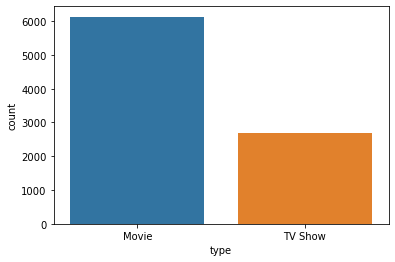

In [68]:
# finding out the number of movies and Tv shows
sns.countplot(x="type", data=df)

From the plot:
* It is clear that Movies data is in majority than then the Tv shows on Netlfix, almost double in Numbers.
* Movies just above 6000 and Tv shows are close to 3000.

Visualize the distributions of rating feature

<AxesSubplot:xlabel='rating', ylabel='count'>

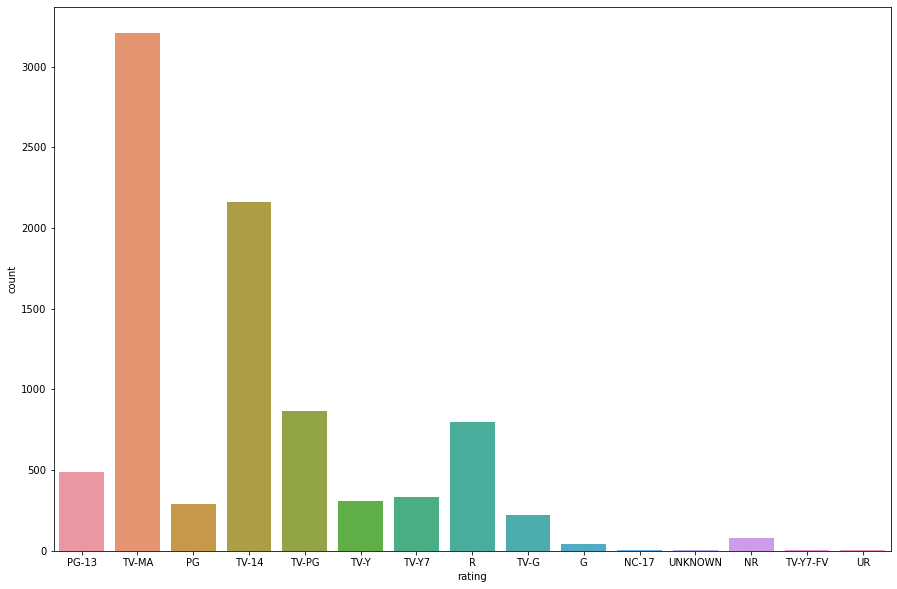

In [69]:
# checking the distributions of the rating feature
plt.figure(figsize=(15,10))
sns.countplot(x="rating", data=df)

Insights from above the plot:
* "TV-MA" and "TV-14" are the most frequent rating on the Netflix
* "NC-17", "TV-Y7-FV", "UR", and "G" are least frequent ratings on the Netflix
*  There exist some Movies or TV shows in which rating is not labeled or not known.

Visualize the distributions along with type of show i.e movie or Tv show

<AxesSubplot:xlabel='rating', ylabel='count'>

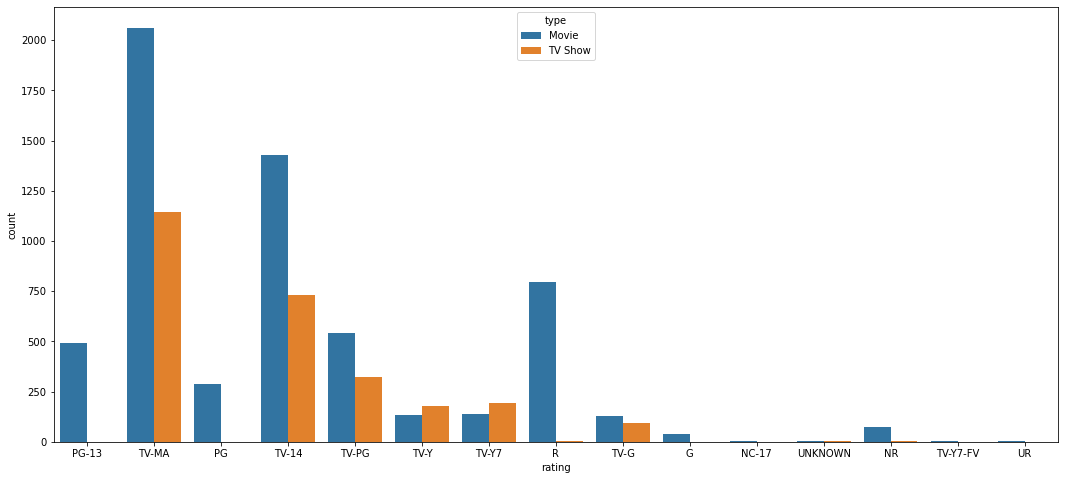

In [70]:
# comparing the distributions of rating in terms of movie and tv shows
plt.figure(figsize=(18,8))
sns.countplot(x="rating", hue = "type", data=df)

Insights from the above plot:

* Most of Movies and TV shows has "TV-MA" rating
* "TV-MA" rating is majorly associtated with the Movies on the Netflix in comparison with the TV shows.
* Only "TV-Y" and "TV-Y7" are the only ratings which are given to the TV shows in majority in comparison with Movies.
* "PG-13", "PG", and "G" ratings are not linked with TV shows, specifically given to the Movies.

Visualize the distribution of the release_date 

<AxesSubplot:xlabel='release_year', ylabel='count'>

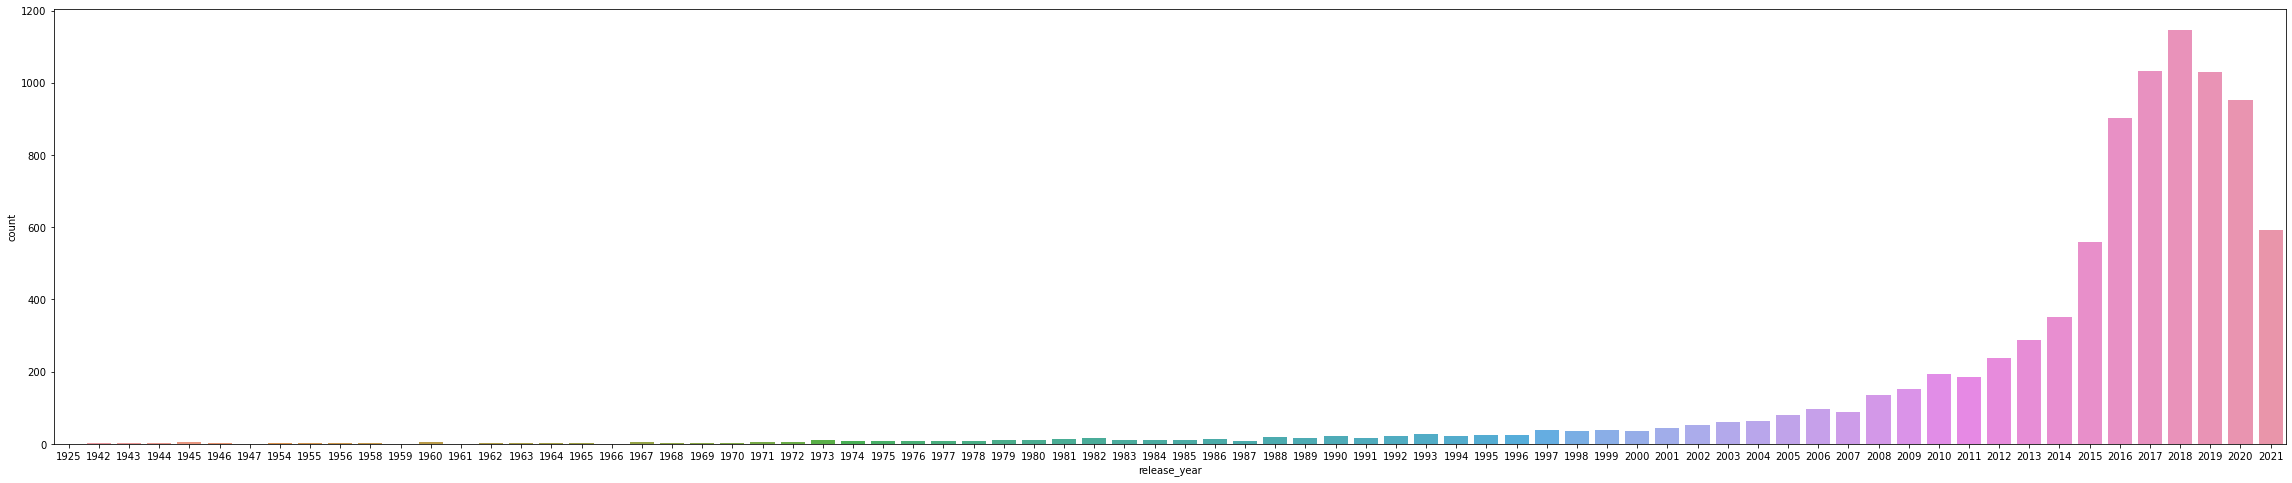

In [71]:
# checking for the counts of movies and tv shows in each release year
plt.figure(figsize=(40,8))
sns.countplot(x="release_year", data=df)

* Majority of the Movies & TV shows are released in period from 2014 to 2021.
* In 2018, most of the Movies & TV shows are released, which is close to 1200.

Count of countries where movies or tv shows were released, top 10

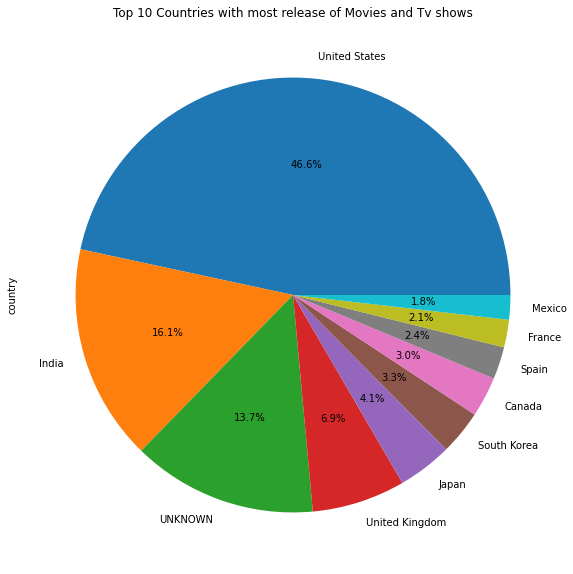

In [72]:
# top 10 countries with most release of movies and tv shows
df["country"].value_counts()[:10].plot.pie(autopct="%1.1f%%", figsize=(10,10))
plt.title("Top 10 Countries with most release of Movies and Tv shows")
plt.show()

* In Movies & TV shows release, the share of America is almost half in comparison with other countries in the top 10.
* India has release percentage of around 16% and just behind America.
* Almost 14% Movies & TV shows are not labelled the country Names. 

Visualizing the count of countries with most number of movies and Tv shows, top 10

In [73]:
counts = df["country"].value_counts()[:10]
# selecting on the records of the top 10 countries with most Movies and Tv shows releases 
top_10_df = df[df["country"].isin(counts.index.to_list()) == True]

<AxesSubplot:xlabel='country', ylabel='count'>

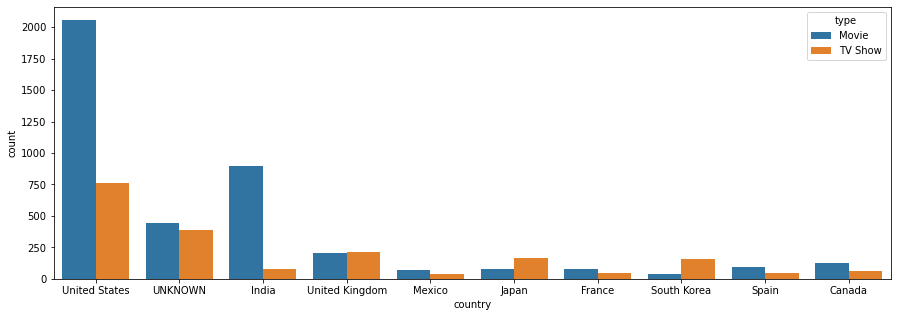

In [74]:
# checking the counts of movies and tv shows of countries
plt.figure(figsize=(15,5))
sns.countplot(x="country", data = top_10_df, hue="type")

* `United States` has the released most number of Movies and TV shows than any other country in world.
* `India` is on the second in terms of most Movies release, but not with respect to TV shows.

Visualizing the count of Listed_in or Genres of movies, top 10

Text(0.5, 1.0, 'Top 10 Genres of Movies')

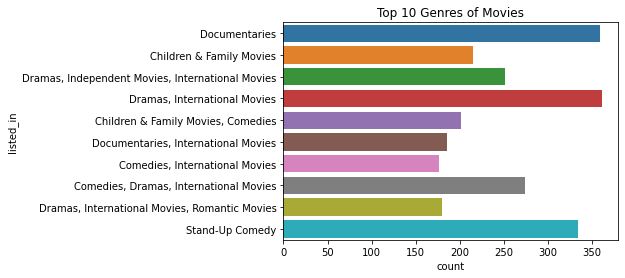

In [75]:
# selecting top 10 frequenct genres of movies
df_movies = df[df["type"] == "Movie"]
df_top_10 = df_movies[df_movies["listed_in"].isin(df_movies["listed_in"].value_counts()[:10].index.to_list()) == True]

# plotting the frequency distribution of the genres of the Movies
#plt.figure(figsize=(35,10))
sns.countplot(y="listed_in", data= df_top_10)
plt.title("Top 10 Genres of Movies")

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

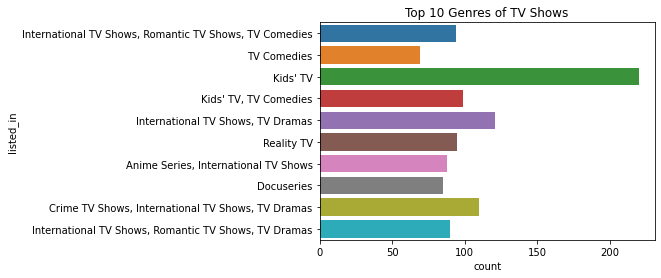

In [76]:
# selecting top 10 frequenct genres of tv shows
df_tv = df[df["type"] == "TV Show"]
top_10 = df_tv[df_tv["listed_in"].isin(df_tv["listed_in"].value_counts()[:10].index.to_list()) == True]

# plotting the frequency distribution of the genres of the tv shows
#plt.figure(figsize=(35,10))
sns.countplot(y="listed_in", data= top_10)
plt.title("Top 10 Genres of TV Shows")

### MAP REPRESENTATION OF THE COUNTRY WISE RELEASE OF MOVIES AND TV SHOWS

In [77]:
# preparing the data to present it into a map
def countryWiseMoviesAndTvCounts(df):
    clean_df = df[df["country"] != "UNKNOWN"]
    movie = []
    tv = []
    map_df = pd.DataFrame()

    unique_countries = clean_df["country"].value_counts()

    # counting the country wise movies and tv shows
    for country in unique_countries.index.to_list():
        MovieAndTv = clean_df[clean_df["country"] == country]["type"].value_counts()
        if "Movie" in MovieAndTv.index.to_list():
            movie.append(MovieAndTv["Movie"])
        else:
            movie.append(0)
        if "TV Show" in MovieAndTv.index.to_list():
            tv.append(MovieAndTv["TV Show"])
        else:
            tv.append(0)
    # updating the results into the dataframe
    map_df["Movie"] = movie
    map_df["TV Show"] = tv
    map_df["country"] = unique_countries.index.to_list()
    
    return map_df

In [78]:
# calling the function
map_df = countryWiseMoviesAndTvCounts(df)

In [90]:
# droping those which have been released in multiple countries
map_df = map_df[map_df["country"].apply(lambda x: "," not in x)] 

In [107]:
# function to create the interactive map representation 
def create_map(type, color):
    data = dict(type = "choropleth", 
    locations = map_df["country"], 
    locationmode = 'country names', 
    z = map_df[type],
    colorscale=color,
    colorbar = {'title' : 'colorbar'}
    )

    layout = dict(geo = {'scope':'world','showlakes':True})
    # creating the map figure
    x = pg.Figure(data = [data] , layout = layout)
    x.update_layout(
            title_text = f"Number of {type} by Country",     
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            )
    )
    po.iplot(x)



#### Number of Movies by Country

In [117]:
create_map("Movie","Oranges")

#### Number of TV Shows by Country

In [118]:
create_map("TV Show","Reds")